# Atratores Caóticos

* PET - Física
* Petiano: Wallysson Pereira da Silva
* Data: 04/07/2025

$\quad$ Este `Notebook` tem como objetivo introduzir a teoria dos atratores caóticos, ilustrando, por meio de simulações 3D, alguns atratores relevantes na literatura. Dentro desse contexto, abordaremos o caso dos atratores estranhos, que serão definidos ao longo das próximas linhas. Com isso em mente, os tópicos abordados são:
- Teoria Geral dos Atratores Caóticos
- Atrator de Lorenz
- Atrator de Rössler
- Atrator de Chua
- Mapa de Hénon
- Conclusão

## Pré-requisitos

$\quad$ Toda a teoria necessária sobre os atratores caóticos será introduzida neste `Notebook`, de modo que não será necessário conhecimento prévio no tópico. Contudo, a principal ferramenta utilizada neste trabalho será a integração numérica via Runge-Kutta de quarta ordem. Logo, é recomendado que o leitor tenha noção mínima desse método, sobretudo em como utilizá-lo.

## Importando bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.animation as animation
from matplotlib.colors import hsv_to_rgb

## Informações sobre as bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.13.0 64bit [MSC v.1941 64 bit (AMD64)]
IPython 8.29.0
OS Windows 11 10.0.26100 SP0
Matplotlib 3.9.2
Numpy 2.1.3
Wed Jul 02 23:49:26 2025 Hora oficial do Brasil

## Teoria Geral dos Atratores Caóticos

$\quad$ Antes de definirmos um atrator caótico, vale a pena uma breve revisão sobre sistemas dinâmicos. Fisicamente falando, um sistema dinâmico é composto por um sistema de equações diferenciais ordinárias (EDOs) que descrevem o comportamento de $n$ variáveis que definem o estado do sistema. Essas variáveis não precisam, necessariamente, representar grandezas espaciais. Nesse contexto, pode-se associar o valor de cada variável a um eixo e, assim, definir o espaço de fase. Nele, dada uma condição inicial (um ponto de partida), as EDOs determinam a evolução do sistema em um pequeno intervalo de tempo $dt$. Para analisar o comportamento do sistema ao longo de intervalos maiores, é necessário integrar essas equações — normalmente por meio de métodos numéricos.

$\quad$ Dentro do espaço de fase, certos pontos ou regiões podem possuir propriedades especiais: são os chamados atratores. Um atrator é uma região para a qual todas as trajetórias próximas convergem com o tempo, permanecendo sob sua influência. Essas trajetórias podem ser periódicas ou caóticas. Quando ocorre o segundo caso, diz-se que o sistema possui um atrator caótico.

$\quad$ No entanto, nem todo atrator caótico é um atrator estranho (strange attractor). Um atrator estranho possui uma propriedade adicional: além da sensibilidade às condições iniciais, ele apresenta estrutura geométrica fractal. Suas trajetórias permanecem confinadas em uma região limitada do espaço de fase, mas, contraintuitivamente, se separam exponencialmente rápido quando muito próximas, pelo menos inicialmente. Todos os atratores analisados aqui seram atratores estranhos.

$\quad$ Grande parte do avanço nos estudos de sistemas caóticos, ocorrido a partir da metade do século XX, deveu-se à evolução tecnológica dos computadores. Muitas das propriedades dos sistemas dinâmicos caóticos só podem ser investigadas por meio de simulações numéricas — uma tarefa que era bastante limitada nos primeiros computadores, tanto pelo baixo poder de processamento (insuficiente para os propósitos desejados) quanto pela confiabilidade questionável dos resultados.

$\quad$ Assim, o que faremos neste trabalho é apresentar alguns dos atratores estranhos mais conhecidos e importantes da literatura, evoluindo trajetórias com condições iniciais próximas no espaço de fase e observando seu comportamento. Para isso, utilizaremos a biblioteca de integração numérica `scipy.integrate`, que nos fornece a função `odeint`, capaz de integrar EDOs e calcular a evolução temporal de uma condição inicial.

## Atrator de Lorenz

$\quad$ Naturalmente, devemos começar pelo mais famoso atrator caótico da literatura: o Atrator de Lorenz. Ele é particularmente conhecido por ter sido o primeiro atrator descoberto. Ao analisar um sistema de EDOs que descrevia a convecção atmosférica, o matemático e climatologista Edward Lorenz percebeu uma sensibilidade extrema às condições iniciais do sistema. Ou seja, trajetórias que começavam próximas divergiam rapidamente, tornando inviável fazer previsões de longo prazo para esse sistema. Foi nesse contexto que surgiu a expressão "efeito borboleta", como uma analogia ao fato de que "o bater de asas de uma borboleta no Brasil pode causar um tornado no Texas".

$\quad$ O sistema de EDOs analizado por Lorenz foi o seguinte:


$$
\frac{dx}{dt} = \sigma (-x+y), \quad \frac{dy}{dt} = -xz+\rho x - y \quad \text{e} \quad \frac{dz}{dt} = xy-\beta z.
$$

Onde podemos definir a seguinte função, já num formato conveninente para usar na função `odeint`.

In [3]:
def lorenz(r, t, sigma, rho, beta):
    x, y, z = r[0], r[1], r[2]  
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return [dx, dy, dz]

$\quad$ Para ilustrar a dinâmica do sistema de EDOs, evoluiremos a condição inicial $\mathbf{(1,1,1)}$ no espaço de fase, visualizando o resultado em um gráfico 3D. Utilizaremos os parâmetros clássicos que tornam o sistema caótico ($\sigma = 10$, $\rho = 28$, $\beta = 8/3$), valores estes consagrados na literatura desde os trabalhos originais de Lorenz. A escolha da condição inicial $(1,1,1)$ não é arbitrária - embora o sistema exiba comportamento caótico para uma ampla gama de condições iniciais, este ponto específico nos permite observar claramente a formação característica do "duplo vórtice" do atrator, com o gráfico resultante revelando a não-periodicidade das órbitas e a estrutura fractal subjacente.

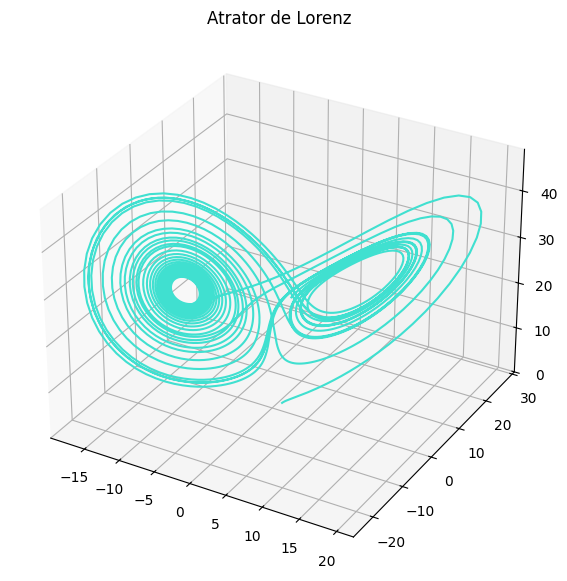

In [4]:
# Parâmetros do sistema.
sigma = 10
rho = 28
beta = 8/3

# Condição inicial.
r0 = [1,1,1]

# Vetor temporal.
tempos = np.linspace(0, 30, 3000)

#Evolução da trajetória.
sol = odeint(lorenz, r0, tempos, args = (sigma,rho, beta))

# Plotagem.
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Lorenz")
plt.show()

$\quad$ Uma maneira particularmente reveladora de analisar a dinâmica do sistema de Lorenz consiste em observar as projeções das trajetórias nos planos coordenados (xy, xz ou yz). Essas projeções bidimensionais capturam aspectos essenciais da estrutura do atrator, sendo que na projeção xy surge a icônica silhueta em forma de asas de borboleta que tornou o sistema de Lorenz tão reconhecível. Ao evoluir numericamente as equações e plotar essas projeções, podemos identificar padrões fundamentais: as trajetórias oscilam irregularmente entre os dois lobos característicos, nunca se repetindo exatamente, mas sempre mantendo-se confinadas na região do atrator. Particularmente na projeção xy, é possível observar como as órbitas transitam de um lobo para outro seguindo um padrão aparentemente aleatório, mas que na verdade obedece a regras determinísticas rigorosas - um paradoxo que está no cerne da teoria do caos.

Text(0.5, 0.98, 'Projeções do Atrator de Lorenz')

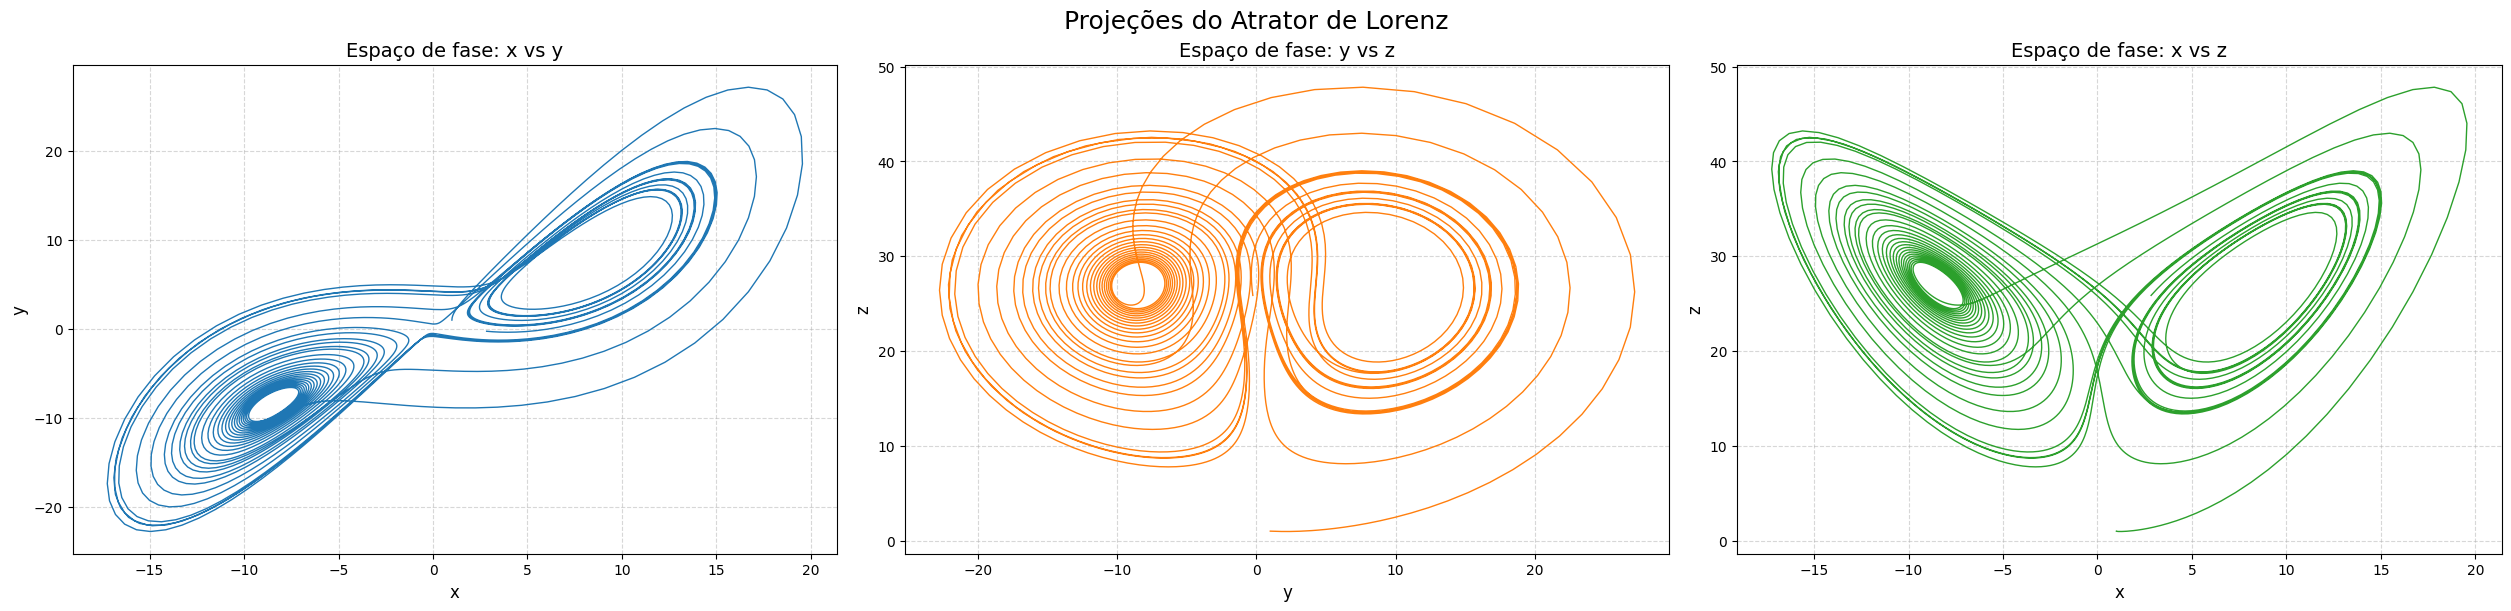

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

# Gráfico x vs y
axes[0].plot(sol[:,0], sol[:,1], color='tab:blue', linewidth=1)
axes[0].set_xlabel("x", fontsize=12)
axes[0].set_ylabel("y", fontsize=12)
axes[0].set_title("Espaço de fase: x vs y", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Gráfico y vs z
axes[1].plot(sol[:,1], sol[:,2], color='tab:orange', linewidth=1)
axes[1].set_xlabel("y", fontsize=12)
axes[1].set_ylabel("z", fontsize=12)
axes[1].set_title("Espaço de fase: y vs z", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Gráfico x vs z
axes[2].plot(sol[:,0], sol[:,2], color='tab:green', linewidth=1)
axes[2].set_xlabel("x", fontsize=12)
axes[2].set_ylabel("z", fontsize=12)
axes[2].set_title("Espaço de fase: x vs z", fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.5)

# Título geral da figura (opcional)
fig.suptitle("Projeções do Atrator de Lorenz", fontsize=18)

$\quad$ Para compreender verdadeiramente a dinâmica caótica do sistema, a visualização animada das trajetórias no espaço de fase se revela indispensável. Nossa abordagem consistirá em: (1) definir um ponto de referência como condição inicial padrão (tipicamente a origem ou outro ponto notável do atrator); (2) criar um conjunto de condições iniciais ligeiramente perturbadas em torno deste ponto (com variações da ordem de 10⁻⁵ a 10⁻³); (3) integrar numericamente todas essas trajetórias simultaneamente. A magia ocorre na visualização passo-a-passo: em cada intervalo temporal Δt, plotamos apenas as posições atuais como pontos pretos no espaço 3D, permitindo observar em tempo real como trajetórias inicialmente próximas divergem exponencialmente - a assinatura do caos. Esta técnica revela claramente a estrutura do atrator e sua sensibilidade às condições iniciais. Implementaremos isso com:

In [6]:
# Valores de tempos 
tempos = np.linspace(0, 30, 1200) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.

# Condições Iniciais
epsilon = 10e-4 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([0,0,0], float)
N = 6
r_iniciais = r_inicial + epsilon * np.arange(N+1).reshape(-1,1)

# Armazenar as soluções 
solucoes = []
for r0 in r_iniciais:
    sol = odeint(lorenz, r0, tempos, args = (sigma, rho, beta))
    solucoes.append(sol)


# Dimensões do plot
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Trajetórias fixas
linhas = []
for sol in solucoes:
    linha, = ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.8, alpha=0.6)
    linhas.append(linha)

# Pontos móveis (um por trajetória)
pontos = []
for _ in solucoes:
    ponto, = ax.plot([], [], [], 'ko', markersize=4)  # 'ko' = marcador preto
    pontos.append(ponto)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f'Atrator de Lorenz - {frame_idx/len(tempos)*100:.0f}%')
    ax.view_init(elev=30, azim=(frame_idx * 0.5) % 360)

    # Atualizar a posição do ponto.
    for i, sol in enumerate(solucoes):
        x, y, z = sol[frame_idx]
        pontos[i].set_data([x], [y])              # X e Y
        pontos[i].set_3d_properties([z])          # Z
    return pontos

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=60, blit=False)
plt.close(fig) # Impede que o gráfico apareça como figura estática
ani.save('Lorenz.gif', writer='pillow')

![lorenz_attractor](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExdnB1a2V5cHM1cTJkaDBwZjEyZzBkcXMycGFqN2JhNHlqeWdodWx3aiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Unwm7BOVohkULoHNLG/giphy.gif)

$\quad$ Podemos observar que as trajetórias permanecem próximas inicialmente, mas começam a divergir de forma gradual e perceptível. O momento crítico ocorre quando, durante a transição entre os lobos do atrator (as chamadas "asas" da estrutura borboleta), os pontos seguem caminhos radicalmente diferentes. Esse ponto de bifurcação marca o limiar onde a sensibilidade às condições iniciais se manifesta claramente: trajetórias que começaram infinitesimalmente próximas agora seguem cursos completamente distintos, ilustrando de maneira dramática a natureza caótica do sistema. A partir desse instante, cada ponto - apesar de ter origem em condições iniciais virtualmente idênticas - desenvolve uma trajetória única no espaço de fase, seguindo padrões aparentemente aleatórios, mas rigorosamente determinísticos.

## Atrator de Rössler

$\quad$ Originalmente estudado por Otto Rössler na década de 1970, o Atrator de Rössler emerge de um sistema de três equações diferenciais ordinárias, conhecido como sistema de Rössler. O atrator resultante neste espaço de fase apresenta certas similaridades com o atrator de Lorenz, porém com uma estrutura consideravelmente mais simples. Esta simplicidade permite que algumas de suas propriedades fundamentais - como a análise de pontos fixos - sejam investigadas através de ferramentas básicas da álgebra linear, embora este aspecto não será abordado em detalhe aqui. Seguindo a mesma metodologia aplicada ao atrator de Lorenz, simularemos a evolução temporal de condições iniciais próximas no espaço de fase do sistema de Rössler, observando o comportamento característico de suas trajetórias.

$\quad$ O sistema de EDOs que descrevem o sistema de Rössler é

$$
\frac{dx}{dt} = -(y+z), \quad \frac{dy}{dt} =x+ay\quad \text{e} \quad \frac{dz}{dt} = b+z(x-c).
$$

In [7]:
def Rossler(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = -(y+z)
    dy = x+a*y
    dz = b+z*(x-c)
    return [dx, dy, dz]

$\quad$ 

$\quad$ Seguindo a mesma metodologia aplicada ao atrator de Lorenz, começaremos nossa análise do sistema de Rössler evoluindo uma única condição inicial no espaço de fase. Essa abordagem inicial, que já mostrou-se reveladora no caso anterior, nos permitirá identificar as características fundamentais deste atrator - particularmente sua estrutura espiralada em torno de um eixo central com uma dobra caótica mais pronunciada em um dos planos. Observaremos como, assim como no sistema de Lorenz, a trajetória parece seguir um padrão ordenado inicialmente, para depois revelar seu comportamento verdadeiramente caótico à medida que se aproxima da região da dobra.

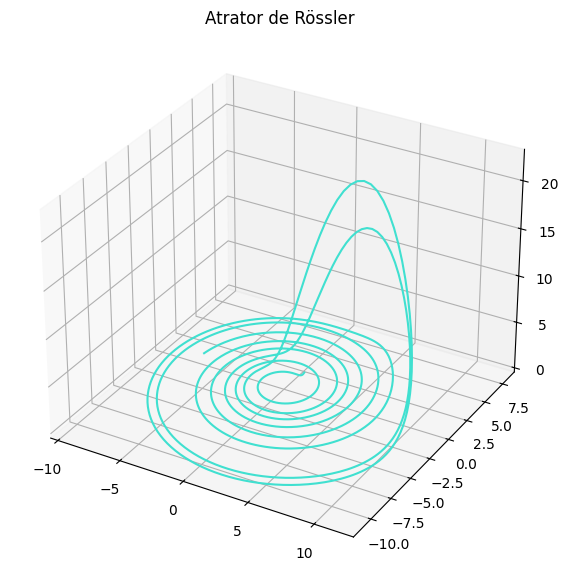

In [8]:
# Parâmetros do sistema
a, b, c = 0.2, 0.2, 5.7

# Condição inicial
r0 = [1,1,1]

# Vetor temporal
tempos = np.linspace(0, 50, 2000)

# Evolução temporal.
sol = odeint(Rossler, r0, tempos, args = (a,b,c))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Rössler")
plt.show()

$\quad$ Novamente como no caso anterior do atrator de Lorenz, analisaremos as projeções do atrator de Rössler nos três planos coordenados (xy, xz e yz), revelando aspectos distintos de sua estrutura. Na projeção xy, surge claramente o movimento espiral característico em torno da origem, enquanto a projeção xz destaca a dramática dobra não-linear que caracteriza o caos neste sistema. A projeção yz, por sua vez, mostra como essas duas dinâmicas se combinam. Comparando com o Lorenz, notamos que o Rössler apresenta uma transição mais abrupta entre o comportamento espiralado e a região caótica - particularmente evidente na projeção xz, onde vemos trajetórias que subitamente "saltam" de um lado para outro, em contraste com a transição mais suave do Lorenz.

Text(0.5, 0.98, 'Projeções do Atrator de Rössler')

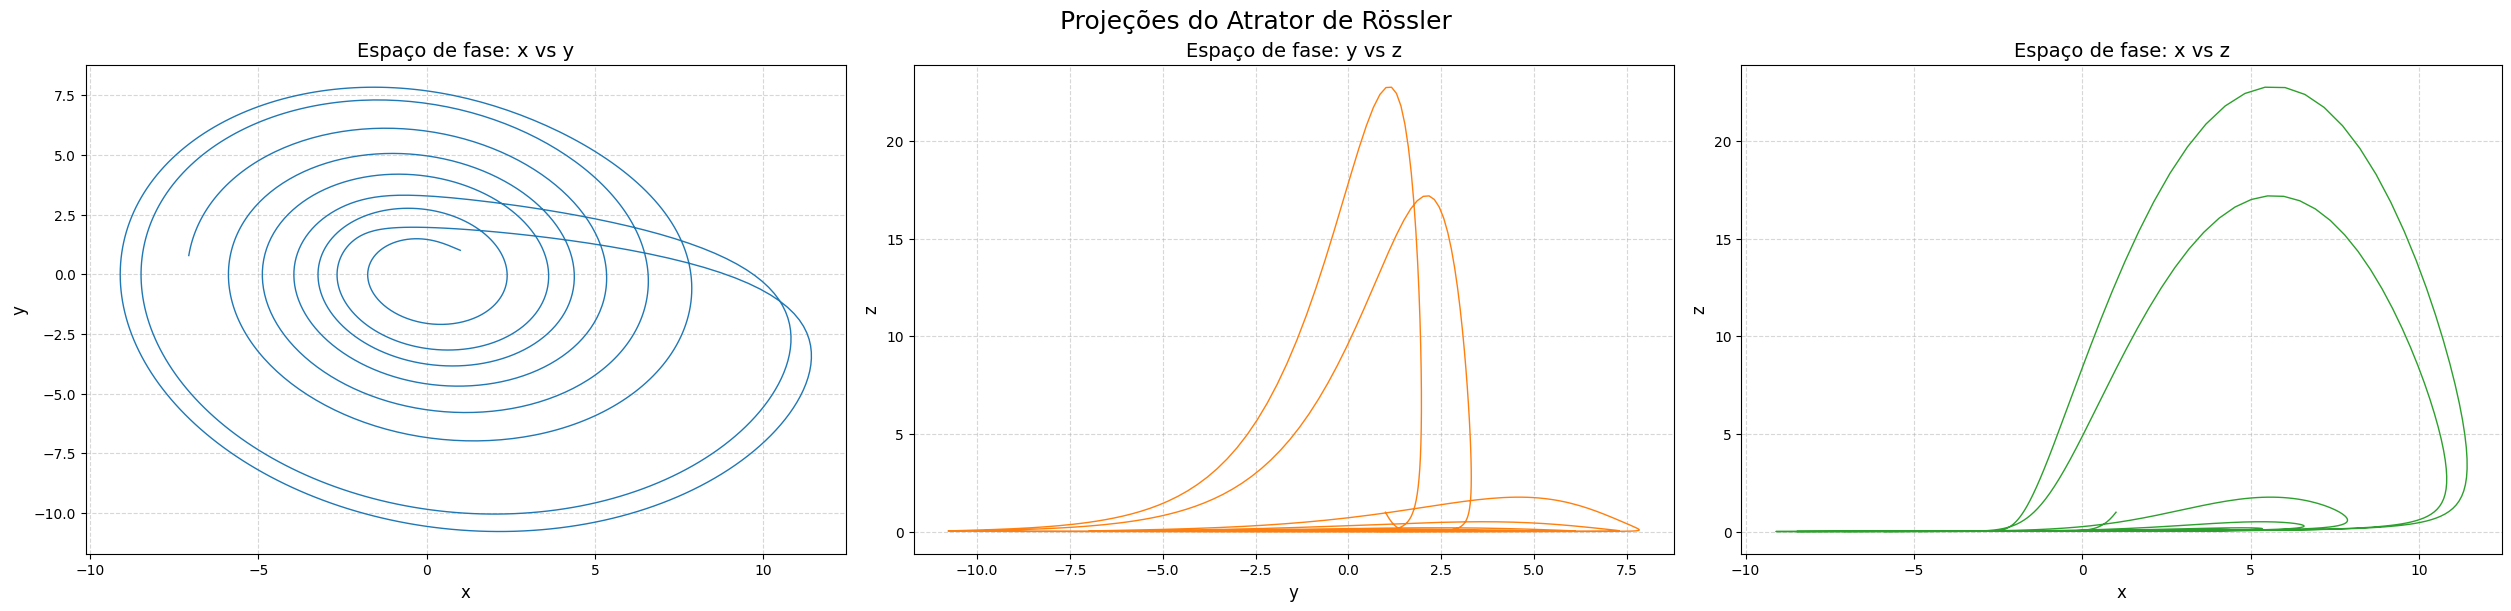

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

# Projeção x vs y
axes[0].plot(sol[:,0], sol[:,1], color='tab:blue', linewidth=1)
axes[0].set_xlabel("x", fontsize=12)
axes[0].set_ylabel("y", fontsize=12)
axes[0].set_title("Espaço de fase: x vs y", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Projeção y vs z
axes[1].plot(sol[:,1], sol[:,2], color='tab:orange', linewidth=1)
axes[1].set_xlabel("y", fontsize=12)
axes[1].set_ylabel("z", fontsize=12)
axes[1].set_title("Espaço de fase: y vs z", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Projeção x vs z
axes[2].plot(sol[:,0], sol[:,2], color='tab:green', linewidth=1)
axes[2].set_xlabel("x", fontsize=12)
axes[2].set_ylabel("z", fontsize=12)
axes[2].set_title("Espaço de fase: x vs z", fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.5)

# Título geral da figura (opcional)
fig.suptitle("Projeções do Atrator de Rössler", fontsize=18)

$\quad$ Finalmente, para capturar plenamente a essência caótica do atrator de Rössler, realizaremos uma animação da evolução simultânea de múltiplas condições iniciais no espaço de fase - tal como fizemos para o sistema de Lorenz. Esta visualização dinâmica revelará como trajetórias inicialmente próximas (espaçadas por ∼$10^{-3}$ unidades) se comportam de maneira radicalmente diferente após cruzarem a região da dobra não-linear. Ao contrário do Lorenz, onde a divergência ocorre de forma mais distribuída, no Rössler observamos um ponto crítico bem definido: quando as trajetórias atingem a dobra no plano xz, sofrem uma separação abrupta, espalhando-se pelo atrator de maneira quase explosiva. A animação destacará este momento-chave, mostrando como o sistema amplifica microscopicamente diferenças infinitesimais em variações macroscópicas - um testemunho visual do conceito de sensibilidade às condições iniciais que define os sistemas caóticos.

In [10]:
# Valores de tempos 
tempos = np.linspace(0, 60, 1000) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.

# Condições Iniciais
epsilon = 10e-3 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([1,1,1], float)
N = 10
r_iniciais = r_inicial + epsilon * np.arange(N+1).reshape(-1,1)

# Armazenar as soluções 
solucoes = []
for r0 in r_iniciais:
    sol = odeint(Rossler, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

# Dimensões do plot
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Trajetórias fixas
linhas = []
for sol in solucoes:
    linha, = ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.8, alpha=0.6)
    linhas.append(linha)

# Pontos móveis (um por trajetória)
pontos = []
for _ in solucoes:
    ponto, = ax.plot([], [], [], 'ko', markersize=4)  # 'ko' = marcador preto
    pontos.append(ponto)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f'Atrator de Rössler - {frame_idx/len(tempos)*100:.0f}%')
    ax.view_init(elev=30, azim=(frame_idx * 0.5) % 360)

    for i, sol in enumerate(solucoes):
        x, y, z = sol[frame_idx]
        pontos[i].set_data([x], [y])              # X e Y
        pontos[i].set_3d_properties([z])          # Z
    return pontos

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=60, blit=False)
plt.close(fig) # Impede que o gráfico apareça como figura estática
ani.save('Rossler.gif', writer='pillow')


![rossler_attractor](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExdzlwdDk2ZTFzenJyN21xdWtkd2hkdDF3ZGxyN2ltbG1wbmZoenR4ZSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/B8Qfo5wVh5ycB6kGGU/giphy.gif)

$\quad$ A animação revela o momento exato em que a natureza caótica do Atrator de Rössler se manifesta: quando as trajetórias atingem a região da dobra característica no plano xz. Neste ponto crítico, ocorre uma transformação drástica no comportamento do sistema: as trajetórias que vinham seguindo um padrão espiralado relativamente ordenado repentinamente encontram a região de dobra não-linear. Aqui, mesmo condições iniciais extremamente próximas começam a divergir de maneira acelerada. Este ciclo repetitivo de estiramento-dobragem-torção é o responsável pela divergência progressiva das trajetórias. Na animação, observamos claramente como pontos inicialmente agrupados vão se espalhando pelo atrator, especialmente após cada passagem pela zona crítica de dobra. 

## Atrator de Chua

$\quad$ Conhecido como Double-Scroll Attractor, o Atrator de Chua emerge de um circuito eletrônico caótico contendo um resistor não-linear - o chamado circuito de Chua. Diferente dos atratores de Lorenz e Rössler que estudamos anteriormente, este sistema possui uma importância prática singular: sendo implementável através de componentes eletrônicos básicos, ele representa um dos poucos sistemas caóticos que podem ser fisicamente construídos de maneira relativamente simples. O circuito de Chua consiste essencialmente em indutores, capacitores e seu elemento crucial - um resistor não-linear que introduz a não-linearidade necessária para gerar o comportamento caótico. Esta característica faz do atrator de Chua uma ponte valiosa entre a teoria matemática abstrata e as aplicações físicas concretas do caos.

$\quad$ O sistema de Chua é definido por 

$$
\frac{dx}{dt} = a(y-x), \quad \frac{dy}{dt} = (c-a)x - xz + cy \quad \text{e} \quad \frac{dz}{dt} = xy - bz.
$$

In [11]:
def Chua(r, t, a, b, c):
    x, y, z = r[0], r[1], r[2]  
    dx = a*(y-x)
    dy = (c-a)*x - x*z + c*y
    dz = x*y - b*z
    return [dx, dy, dz]

$\quad$ Como já é de costume em nossas análises, vamos evoluir uma trajetória no espaço de fase do Atrator de Chua para observar seu comportamento dinâmico característico. Ao simularmos a evolução temporal do sistema, poderemos acompanhar como a trajetória transita de forma caótica entre os dois rolos característicos do Double-Scroll, revelando a essência do comportamento não-linear deste circuito. A dinâmica mostra períodos de permanência em cada região espiralada, seguidos por transições abruptas entre elas - um padrão que, embora aparentemente aleatório, segue rigorosamente as equações determinísticas do sistema. Esta visualização será particularmente reveladora, pois captura a correspondência direta entre o comportamento matemático abstrato e a manifestação física real no circuito eletrônico, onde cada transição entre os scrolls corresponde a uma mudança no regime de operação dos componentes. Assim:

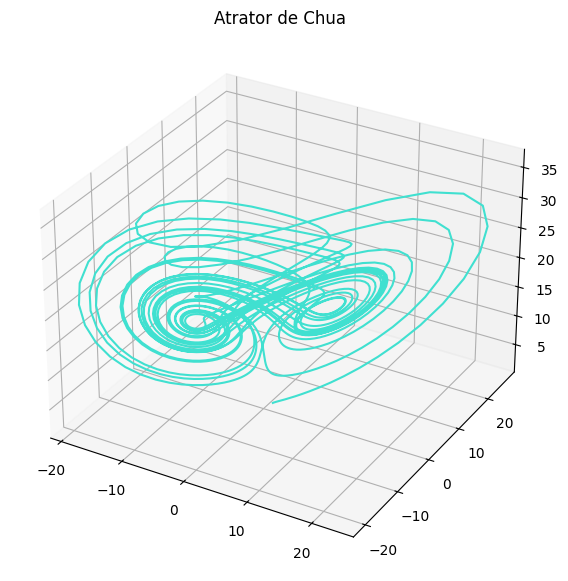

In [12]:
# Parâmetros do sistema
a, b, c = 40, 3, 28

# Condição inicial
r0 = [1,1,1]

# Vetor temporal
tempos = np.linspace(0, 20, 2000)

# Evolução temporal.
sol = odeint(Chua, r0, tempos, args = (a,b,c))

# Plotagem
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot(sol[:,0], sol[:,1], sol[:,2], color="turquoise")
ax.set_title("Atrator de Chua")
plt.show()

$\quad$ Analisando as projeções do atrator de Chua nos planos coordenados, observamos sua característica mais distintiva: a figura do double-scroll se forma claramente, mostrando duas regiões espirais conectadas por trajetórias caóticas. Na projeção xy, vemos os dois "rolos" simétricos, enquanto a projeção xz revela as transições abruptas entre eles. A projeção yz completa o retrato tridimensional, exibindo como as trajetórias se dobram e torcem ao passar de um scroll para outro.

Text(0.5, 0.98, 'Projeções do Atrator de Chua')

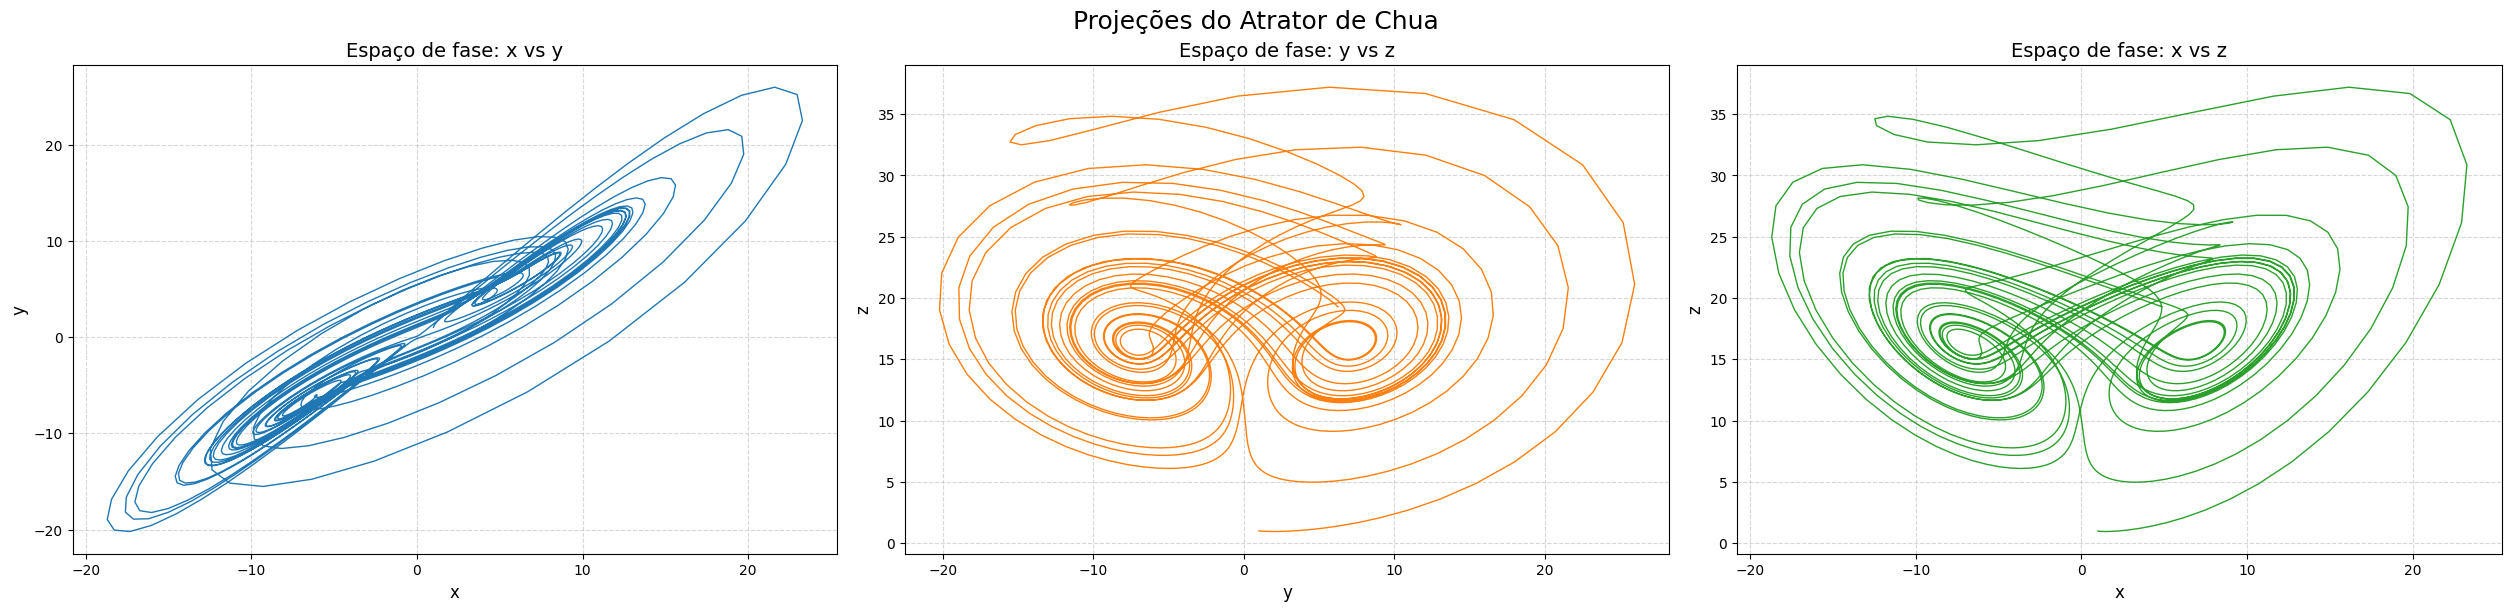

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(25, 6), constrained_layout=True)

# Projeção x vs y
axes[0].plot(sol[:,0], sol[:,1], color='tab:blue', linewidth=1)
axes[0].set_xlabel("x", fontsize=12)
axes[0].set_ylabel("y", fontsize=12)
axes[0].set_title("Espaço de fase: x vs y", fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.5)

# Projeção y vs z
axes[1].plot(sol[:,1], sol[:,2], color='tab:orange', linewidth=1)
axes[1].set_xlabel("y", fontsize=12)
axes[1].set_ylabel("z", fontsize=12)
axes[1].set_title("Espaço de fase: y vs z", fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.5)

# Projeção x vs z
axes[2].plot(sol[:,0], sol[:,2], color='tab:green', linewidth=1)
axes[2].set_xlabel("x", fontsize=12)
axes[2].set_ylabel("z", fontsize=12)
axes[2].set_title("Espaço de fase: x vs z", fontsize=14)
axes[2].grid(True, linestyle='--', alpha=0.5)

# Título geral
fig.suptitle("Projeções do Atrator de Chua", fontsize=18)

$\quad$ Para visualizar a dinâmica completa do atrator de Chua, implementaremos agora uma animação que mostra a evolução temporal de múltiplas condições iniciais próximas, revelando como trajetórias quase idênticas divergem exponencialmente ao cruzarem a região central entre os dois scrolls - o coração da caoticidade deste sistema.

In [14]:
# Valores de tempos 
tempos = np.linspace(0, 20, 1000) # Evoluir desde t=0 até t=25, com 1500 pontos nesse intervalo.

# Condições Iniciais
epsilon = 10e-5 # Diferença entre cada coordenadada para o vetor da condição inicial
r_inicial = np.array([0,0,0], float)
N = 10
r_iniciais = r_inicial + epsilon * np.arange(N+1).reshape(-1,1)

# Armazenar as soluções 
solucoes = []
for r0 in r_iniciais:
    sol = odeint(Chua, r0, tempos, args = (a, b, c))
    solucoes.append(sol)

# Dimensões do plot
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

# Trajetórias fixas
linhas = []
for sol in solucoes:
    linha, = ax.plot(sol[:,0], sol[:,1], sol[:,2], lw=0.8, alpha=0.6)
    linhas.append(linha)

# Pontos móveis (um por trajetória)
pontos = []
for _ in solucoes:
    ponto, = ax.plot([], [], [], 'ko', markersize=4)  # 'ko' = marcador preto
    pontos.append(ponto)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f'Atrator de Chua - {frame_idx/len(tempos)*100:.0f}%')
    ax.view_init(elev=30, azim=(frame_idx * 0.5) % 360)

    for i, sol in enumerate(solucoes):
        x, y, z = sol[frame_idx]
        pontos[i].set_data([x], [y])              # X e Y
        pontos[i].set_3d_properties([z])          # Z
    return pontos

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=len(tempos), interval=60, blit=False)
plt.close(fig) # Impede que o gráfico apareça como figura estática
ani.save('Chua.gif', writer='pillow')


![chua_attractor](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExajdodnFoaGdrdWlxdnpnenQ1M3B5ZnZxMWRud3kzZnlma2d1aGdqNiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/z03ULnpEiz7XCw3TdG/giphy.gif)

$\quad$ A animação revela como trajetórias inicialmente quase idênticas - separadas por meros $10^{-5}$ em suas condições iniciais - sofrem uma dramática divergência ao cruzarem a região central entre os scrolls. No momento crítico da transição, o sistema manifesta sua natureza caótica: as trajetórias que pareciam paralelas são submetidas a um intenso processo de estiramento e torção, emergindo da zona central seguindo caminhos radicalmente distintos. Cada passagem por esta região age como um amplificador não-linear de diferenças, transformando variações infinitesimais em divergências macroscópicas.

## Hénon Map

$\quad$ Motivado pelas equações de Lorenz, Michel Hénon propôs em 1976 um mapa bidimensional simplificado que captura a essência da dinâmica caótica - particularmente o mecanismo de "esticar e dobrar" presente em sistemas como o de Lorenz. O mapa de Hénon rapidamente se estabeleceu como paradigma para estudo do caos determinístico, combinando simplicidade matemática com comportamento dinâmico elaborado. Embora inicialmente abstrato, o modelo encontrou interpretações físicas notáveis, especialmente em sistemas oscilatórios não-lineares, onde seu comportamento caótico serve como guia para entender fenômenos como mistura caótica e transporte em sistemas Hamiltonianos.

$\quad$ O mapa de Hénon é definido como

$$ 
x_{n+1} = 1 - ax_n^2 + y_n \ \text{ e } \ y_{n+1} = bx_n.
$$

In [15]:
def henon_map(xn, yn, a, b):
    xn_p1 = 1 - a * xn**2 + yn
    yn_p1 = b * xn
    return np.array([np.clip(xn_p1, -1e10, 1e10), np.clip(yn_p1, -1e10, 1e10)], float)


$\quad$ Utilizando os parâmetros clássicos do mapa de Hénon ($a = 1.4$ e $b = 0.3$) e evoluindo a condição inicial $(x,y) = (0,0)$ por 400 iterações, obtemos o característico atrator de Hénon. O gráfico revela a estrutura fractal típica de sistemas caóticos, com seu padrão distinto de dobras sucessivas que exemplificam o mecanismo de esticar e dobrar. Observamos ainda uma distribuição não-uniforme de pontos, formando regiões de maior densidade que destacam a geometria complexa do atrator, tudo isso emergindo de equações aparentemente simples.

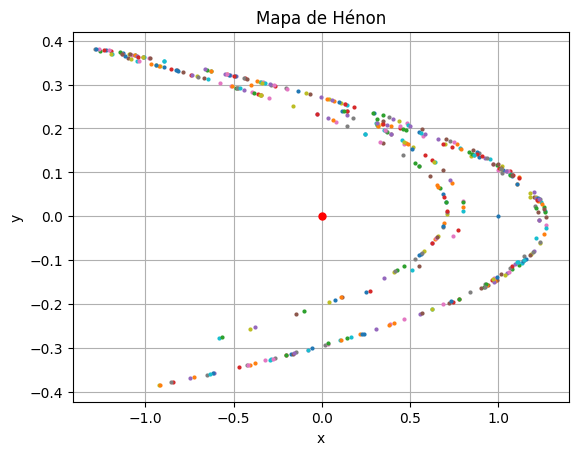

In [16]:
# Constantes.
a, b = 1.4, 0.3 

# Condição inicial.
r0 = np.array([0,0], float) # Condição Inicial

# Listas para a plotagem. 
xs = [r0[0]]
ys = [r0[1]]

# Plot da condição inicial.
plt.plot(r0[0], r0[1], marker='o', color = 'red',  linestyle='', markersize=5)

# Evolução do mapa.
N = 400
for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    plt.plot(r0[0], r0[1], marker='o', linestyle='', markersize=2)

# Plot
plt.ylabel("y")
plt.xlabel("x")
plt.grid()
plt.title("Mapa de Hénon")
plt.show()

$\quad$ Uma das propriedades fundamentais do mapa de Hénon é a existência de um ponto fixo estável. Para os parâmetros clássicos ($a = 1.4$ e $b = 0.3$), esse ponto está localizado em $(x,y) \approx (0.631, 0.189)$. Este ponto fixo pode ser determinado resolvendo o sistema de equações $x = 1 - ax^2 + y$ e $y = bx$ simultaneamente. Embora o sistema como um todo exiba comportamento caótico, a existência deste ponto fixo estável revela a estrutura subjacente e a complexidade da dinâmica do mapa de Hénon.

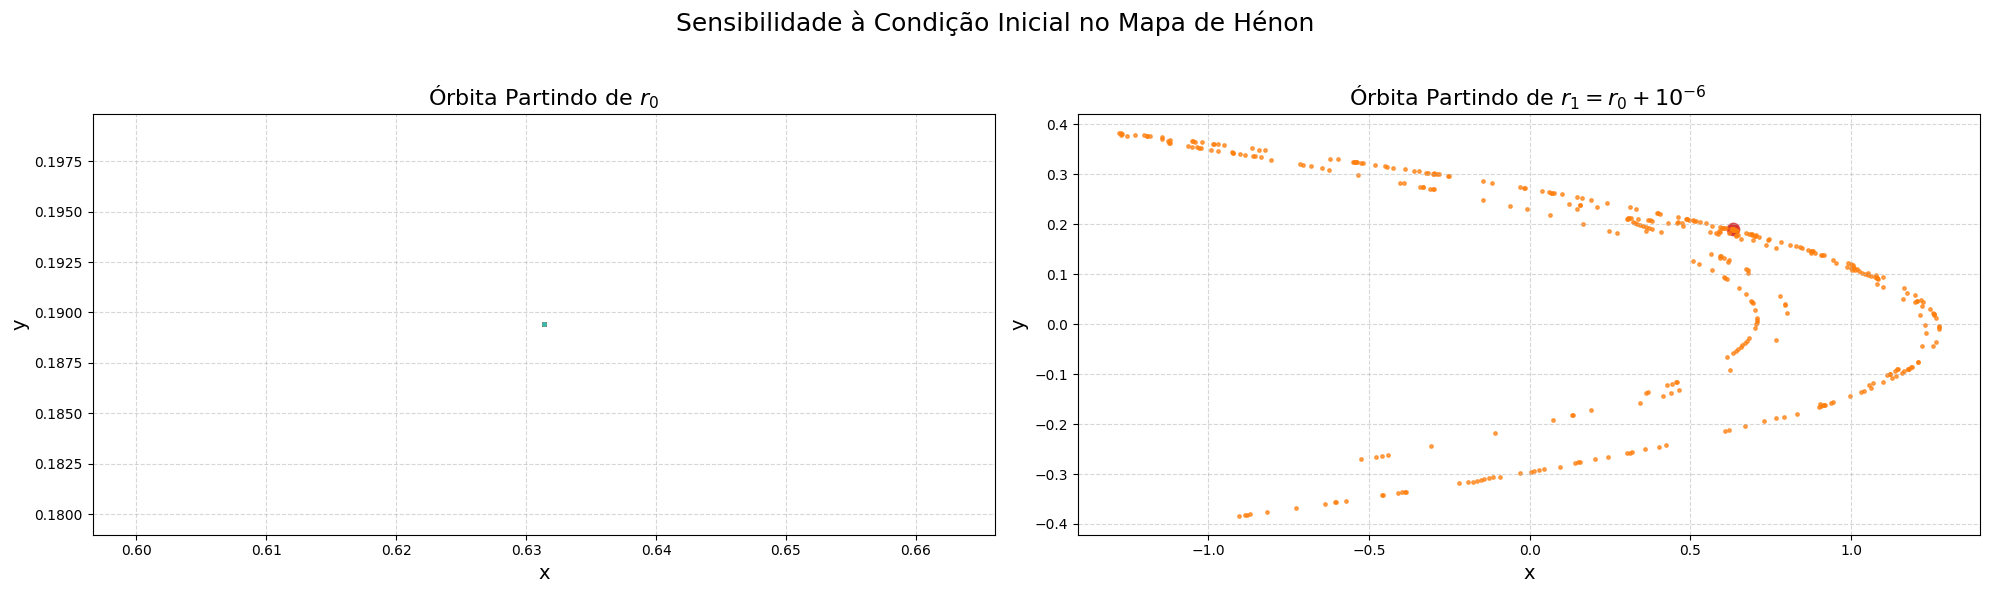

In [17]:
# Definindo a condição inicial estável do mapade henon.
r0 = np.array([(np.sqrt(609)-7)/28,  3*(np.sqrt(609)-7)/(280)], float)


# Definindo uma condição inicial com uma pequena pertubação em relação à r0.
epsilon = 10e-6
r1 = np.array([r0[0] + epsilon, r0[1] + epsilon], float) 

# Criar a figura.
fig, axes = plt.subplots(1, 2, figsize=(20, 6)) 
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.5)

N = 400
# Primeiro gráfico: r0
axes[0].set_xlabel("x", fontsize=14)
axes[0].set_ylabel("y", fontsize=14)
axes[0].set_title("Órbita Partindo de $r_0$", fontsize=16)

# Evoluir r0
axes[1].scatter(r0[0], r0[1], s=80, color="tab:red", alpha=0.7)
for n in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)    
    axes[0].scatter(r0[0], r0[1], s=6, alpha=0.7)

# Segundo gráfico: r1
axes[1].set_xlabel("x", fontsize=14)
axes[1].set_ylabel("y", fontsize=14)  # Corrigido de "z" para "y"
axes[1].set_title("Órbita Partindo de $r_1 = r_0 + 10^{-6}$ ", fontsize=16)

# Evoluir r1
axes[1].scatter(r1[0], r1[1], s=50, color="tab:red", alpha=0.7)
for n in range(N):
    r1 = henon_map(r1[0], r1[1], a, b)    
    axes[1].scatter(r1[0], r1[1], s=6, color="tab:orange", alpha=0.7)


# Título
fig.suptitle("Sensibilidade à Condição Inicial no Mapa de Hénon", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

$\quad$ No caso do mapa de Hénon, a animação da evolução será construída plotando, frame a frame, a trajetória de um único ponto inicial $(x_0,y_0)$ através das iterações sucessivas do mapa. Em cada instante da animação, visualizaremos não apenas a posição atual do ponto, mas todo o histórico de suas posições anteriores, revelando como a órbita gradualmente converge para a vizinhança do atrator e começa a explorar sua estrutura fractal característica. À medida que o número de iterações cresce, a animação tornará visível o processo fundamental de "esticar e dobrar" que dá ao atrator de Hénon sua forma distinta e que é responsável pelo surgimento do caos a partir de regras simples e completamente determinísticas.

In [18]:
# Condição inicial
r0 = np.array([1, 1], float)

# Inicialização das listas para armazenar a trajetória
xs = [r0[0]]
ys = [r0[1]]

# Número de iterações (quadros da animação)
N = 200

# Lista que armazenará a solução completa (trajetória)
sol = [r0.copy()]

# Itera o mapa de Hénon e armazena os pontos
for _ in range(N):
    r0 = henon_map(r0[0], r0[1], a, b)
    sol.append(r0.copy())

# Prepara a figura para a animação
fig, ax = plt.subplots()
ax.set_xlim(-1.5, 1.5)  # Limites do eixo x
ax.set_ylim(-0.5, 0.5)  # Limites do eixo y

# Função chamada a cada frame da animação
def atualizar(frame_idx):
    ax.set_title(f'Mapa de Hénon - {frame_idx/len(sol)*100:.0f}%')

    # Pega o ponto atual
    x, y = sol[frame_idx]

    # Plota o ponto como um ponto pequeno
    ax.scatter(x, y, s=1)

# Cria a animação com os quadros gerados pela função 'atualizar'
ani = animation.FuncAnimation(fig, atualizar, frames=len(sol), interval=50)

# Impede que o gráfico apareça como figura estática
plt.close(fig)
ani.save('mapa_henon.gif', writer='pillow')

![mapa_henon](https://media0.giphy.com/media/v1.Y2lkPTc5MGI3NjExbzYzaGZ6eWVuczdqMWJyNDRla2w5OGlmZGtnMmg0MzRuNzlycmxlYyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/mcJKJ8M1QaRmxPySWT/giphy.gif)

$\quad$ Como abordagem complementar, implementaremos uma visualização dinâmica do mapa de Hénon através da evolução simultânea de uma grade de condições iniciais distribuídas uniformemente no domínio $x \in [-1,1] \times y \in [-1,1]$. Esta simulação revelará dois aspectos fundamentais: (1) como todas as trajetórias, independentemente de sua posição inicial no quadrado $[-1,1]^2$, convergem exponencialmente rápido para a região do atrator; e (2) a maneira pela qual o processo iterativo de esticar e dobrar transforma a grade inicial regular na estrutura fractal característica do atrator de Hénon. Particularmente notável é observar como a distorção progressiva da malha inicial torna visível o mecanismo dinâmico subjacente que gera o comportamento caótico.

In [ ]:
# Criando um grid de condições iniciais
grid_size = 20  # Número de pontos em cada dimensão do grid

x_values = np.linspace(-1, 1, grid_size)
y_values = np.linspace(-1, 1, grid_size)

initial_conditions = []
for x in x_values:
    for y in y_values:
        initial_conditions.append(np.array([x, y], float))

# Número de iterações
N = 15

# Armazenar as trajetórias (incluindo o ponto inicial)
trajectories = []
for r0 in initial_conditions:
    trajectory = [r0.copy()]
    current_point = r0.copy()
    for _ in range(N):
        current_point = henon_map(current_point[0], current_point[1], a, b)
        trajectory.append(current_point.copy())
    trajectories.append(np.array(trajectory))

# Preparando a figura para a animação
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title(f"Evolução do Grid no Mapa de Hénon")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.5, 0.5)
ax.grid(True)

# Criando os objetos de plotagem para cada ponto do grid
scatter_points = ax.scatter([], [], s=5)

# Função de atualização da animação
def atualizar(frame_idx):
    ax.set_title(f"Evolução do Grid no Mapa de Hénon - Iteração {frame_idx}/{N}")
    current_points = np.array([traj[frame_idx] for traj in trajectories])
    scatter_points.set_offsets(current_points)
    return scatter_points,

# Criar a animação
ani = animation.FuncAnimation(fig, atualizar, frames=N + 1, interval=300, blit=True)
plt.close(fig)
ani.save('mapa_henon_grade.gif', writer='pillow')

![mapa_henon_grade](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExeDF1b2xtd2o1aWVnaTU5Z3doMXhhc3p5cnVsZGt3M3JxaXM1Y2JhZyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/AzoGRur8ss9bKTPOcG/giphy.gif)

$\quad$ A animação revela que as trajetórias convergem rapidamente para a vizinhança do atrator de Hénon - tipicamente já na terceira ou quarta iteração. Este comportamento difere significativamente de sistemas como o de Lorenz ou Rössler, onde a convergência para o atrator pode levar mais tempo. No caso do mapa de Hénon, após essas poucas iterações iniciais, os pontos permanecem confinados na estrutura fractal característica, apenas refinando sua distribuição dentro do atrator. Portanto, para visualizações eficientes, basta um número relativamente pequeno de iterações (em torno de 20-30) para capturar completamente a dinâmica essencial do sistema, tornando desnecessárias simulações mais longas.

## Conclusão

$\quad$ O estudo de sistemas caóticos mostra-se essencial para a física contemporânea, com aplicações cruciais em áreas como meteorologia (atrator de Lorenz) e engenharia eletrônica (circuito de Chua). A compreensão profunda de seus mecanismos dinâmicos permite avanços significativos na modelagem de sistemas complexos, no desenvolvimento de técnicas de controle de caos e no projeto de dispositivos com comportamento não-linear controlado. Dessa forma, mesmo com as limitações impostas pela natureza caótica desses sistemas, sua análise qualitativa permanece como ferramenta indispensável para o entendimento e manipulação de fenômenos complexos em diversas áreas científicas e tecnológicas.

## Referências

**[1]** Nonlinear Dynamics and Chaos, Steven H. Strogatz 2nd. Edition.

**[2]** https://en.wikipedia.org/wiki/Lorenz_system

**[3]** https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

**[4]** https://en.wikipedia.org/wiki/Multiscroll_attractor

**[5]** https://en.wikipedia.org/wiki/H%C3%A9non_map

**[6]** Wen, Haoran. "A review of the Hénon map and its physical interpretations." School of Physics Georgia Institute of Technology, Atlanta, GA (2014): 30332-0430.
